Data Science with Crypto
Analysis of past returns and building a prediction model

In [81]:
#https://www.youtube.com/watch?v=oyL99oa6gf8
#import pandas as pd
from pandas_datareader import data as reader
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
end = dt.datetime.now()
start = dt.date(end.year - 4,end.month,end.day)
kryptoList = ['BTC-USD','ETH-USD','XRP-USD','DOGE-USD']

In [83]:
df =  reader.get_data_yahoo(kryptoList,start,end)['Adj Close']

In [84]:
df 

Symbols,BTC-USD,ETH-USD,XRP-USD,DOGE-USD
Date,,,,
2017-06-22,2744.909912,341.739014,0.319978,0.003143
2017-06-23,2608.719971,323.696014,0.311110,0.003135
2017-06-24,2589.409912,303.247986,0.298423,0.002961
2017-06-25,2478.449951,272.691986,0.277288,0.002750
2017-06-26,2552.449951,293.088013,0.276306,0.002623
...,...,...,...,...
2021-06-19,35698.296875,2246.364502,0.776377,0.280900
2021-06-20,31676.693359,1888.447510,0.610388,0.178691
2021-06-21,32505.660156,1874.950073,0.545067,0.191031


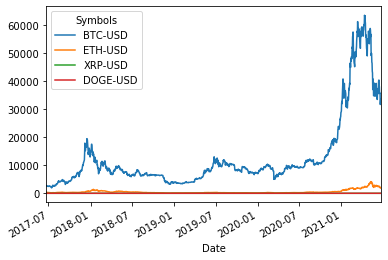

In [85]:
df.plot()
plt.show()

To compare cryptos we work with returns and not absolute prices

In [86]:
daily_returns = df.pct_change().dropna(axis=0)

In [87]:
daily_returns

Symbols,BTC-USD,ETH-USD,XRP-USD,DOGE-USD
Date,,,,
2017-06-23,-0.049615,-0.052798,-0.027714,-0.002545
2017-06-24,-0.007402,-0.063170,-0.040780,-0.055502
2017-06-25,-0.042851,-0.100762,-0.070822,-0.071260
2017-06-26,0.029857,0.074795,-0.003541,-0.046182
2017-06-27,0.008752,0.118869,0.015016,0.064811
...,...,...,...,...
2021-06-19,0.002314,0.031152,0.019305,-0.022467
2021-06-20,-0.112655,-0.159332,-0.213800,-0.363863
2021-06-21,0.026170,-0.007147,-0.107015,0.069058


In [88]:
daily_cum_returns = (daily_returns +1).cumprod()-1

In [89]:
daily_cum_returns

Symbols,BTC-USD,ETH-USD,XRP-USD,DOGE-USD
Date,,,,
2017-06-23,-0.049615,-0.052798,-0.027714,-0.002545
2017-06-24,-0.056650,-0.112633,-0.067364,-0.057906
2017-06-25,-0.097074,-0.202046,-0.133415,-0.125040
2017-06-26,-0.070115,-0.142363,-0.136484,-0.165447
2017-06-27,-0.061976,-0.040417,-0.123518,-0.111359
...,...,...,...,...
2021-06-19,12.005271,5.573333,1.426345,88.373212
2021-06-20,10.540158,4.525993,0.907594,55.853644
2021-06-21,10.842159,4.486497,0.703452,59.779827


<function matplotlib.pyplot.show(*args, **kw)>

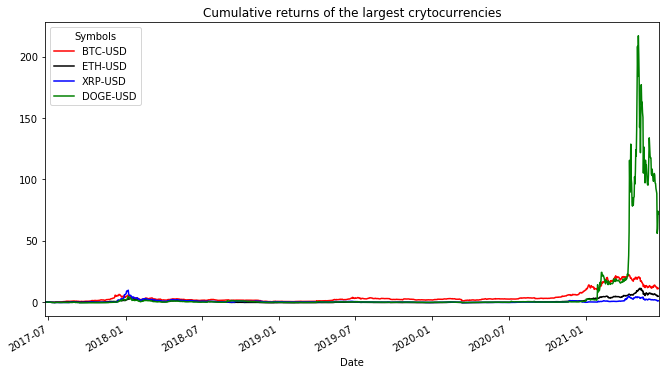

In [90]:
colors = ['r','k','b','g']
daily_cum_returns.plot(color=colors,figsize=(11,6))
plt.title('Cumulative returns of the largest crytocurrencies')
plt.show

Cryptocurrency price charts overt the last 4 years

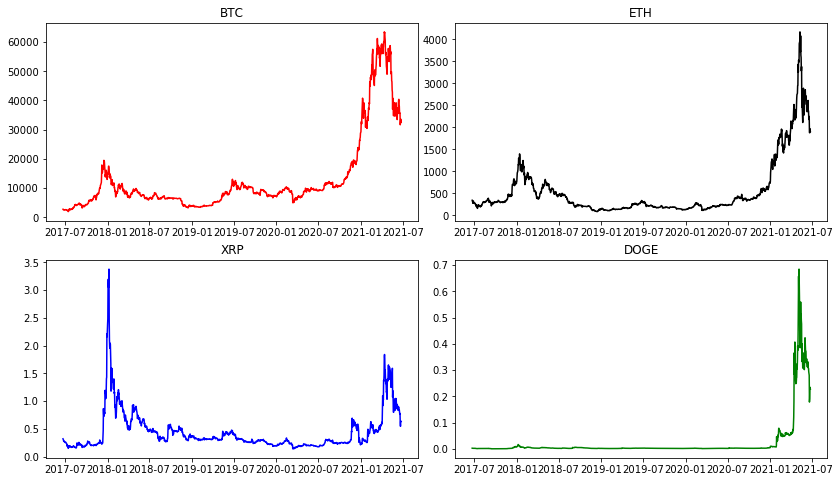

In [91]:
fig, axs = plt.subplots(2,2,figsize=(14,8),gridspec_kw={'hspace':0.2, 'wspace':0.1})
axs[0, 0].plot(df['BTC-USD'],c='r')
axs[0, 0].set_title('BTC')
axs[0, 1].plot(df['ETH-USD'],c='k')
axs[0, 1].set_title('ETH')  
axs[1, 0].plot(df['XRP-USD'],c='b')
axs[1, 0].set_title('XRP')    
axs[1, 1].plot(df['DOGE-USD'],c='g')
axs[1, 1].set_title('DOGE')                       
plt.show()       
               

#Comparison of daily volitiles

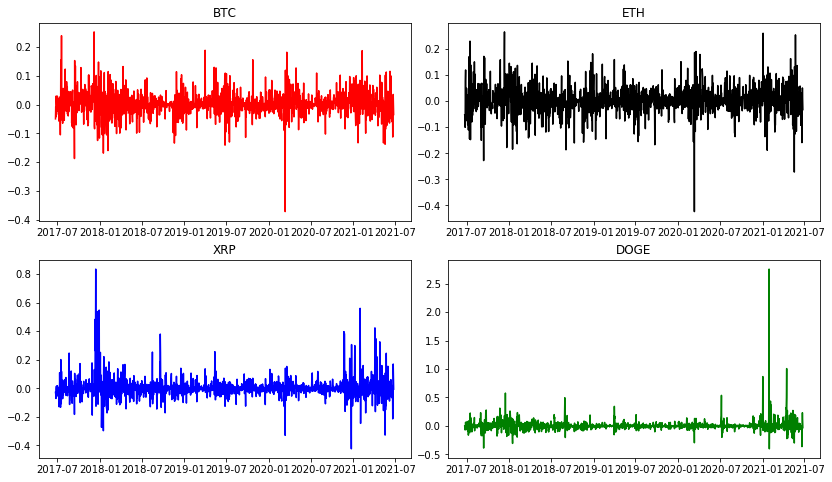

In [92]:
fig, axs = plt.subplots(2,2,figsize=(14,8),gridspec_kw={'hspace':0.2, 'wspace':0.1})
axs[0, 0].plot(daily_returns['BTC-USD'],c='r')
axs[0, 0].set_title('BTC')
axs[0, 1].plot(daily_returns['ETH-USD'],c='k')
axs[0, 1].set_title('ETH')  
axs[1, 0].plot(daily_returns['XRP-USD'],c='b')
axs[1, 0].set_title('XRP')    
axs[1, 1].plot(daily_returns['DOGE-USD'],c='g')
axs[1, 1].set_title('DOGE')                       
plt.show()       

How are returns distributed

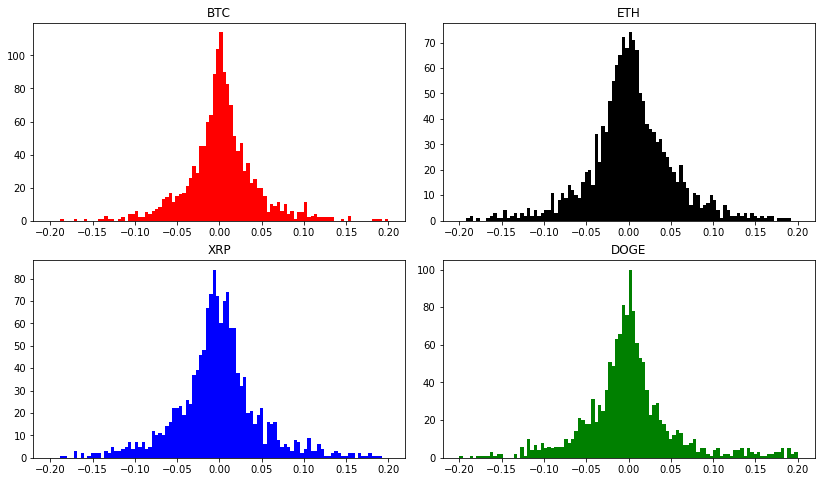

In [93]:
fig, axs = plt.subplots(2,2,figsize=(14,8),gridspec_kw={'hspace':0.2, 'wspace':0.1})
axs[0, 0].hist(daily_returns['BTC-USD'],bins=100,color='r',range=(-0.2,0.2))
axs[0, 0].set_title('BTC')
axs[0, 1].hist(daily_returns['ETH-USD'],bins=100,color='k',range=(-0.2,0.2))
axs[0, 1].set_title('ETH')  
axs[1, 0].hist(daily_returns['XRP-USD'],bins=100,color='b',range=(-0.2,0.2))
axs[1, 0].set_title('XRP')    
axs[1, 1].hist(daily_returns['DOGE-USD'],bins=100,color='g',range=(-0.2,0.2))
axs[1, 1].set_title('DOGE')                       
plt.show()       

Extreme Returns

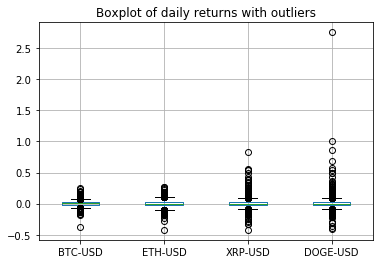

In [94]:
daily_returns.boxplot()
plt.title('Boxplot of daily returns with outliers')
plt.show()

Without outliers

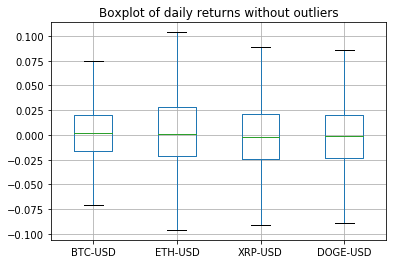

In [95]:
daily_returns.boxplot(showfliers=False)
plt.title('Boxplot of daily returns without outliers')
plt.show()

correlations of Crytocurrency returns

In [96]:
daily_returns.corr()

Symbols,BTC-USD,ETH-USD,XRP-USD,DOGE-USD
Symbols,,,,
BTC-USD,1.000000,0.736155,0.471087,0.375341
ETH-USD,0.736155,1.000000,0.591429,0.356252
XRP-USD,0.471087,0.591429,1.000000,0.285447
DOGE-USD,0.375341,0.356252,0.285447,1.000000


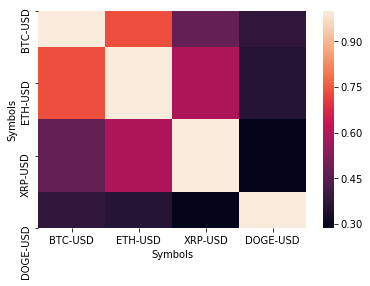

In [97]:
sns.heatmap(daily_returns.corr())
plt.show()

Backtesting a forecasting module with bitcoin